In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet


In [14]:
with open(r'C:\Users\Dell\Desktop\CodSoft\Task 4\spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")


data = pd.read_csv(r'C:\Users\Dell\Desktop\CodSoft\Task 4\spam.csv', encoding=encoding)



Detected encoding: Windows-1252


In [16]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data.rename(columns = {'v1' : 'target' , 'v2' : 'text'}, inplace = True)

In [32]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])

In [40]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [46]:
data.duplicated().sum()

403

In [50]:
data.drop_duplicates(keep = 'first' , inplace = True)

In [52]:
data.duplicated().sum()

0

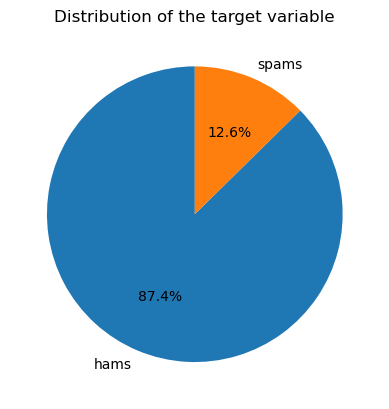

In [58]:
plt.pie(data['target'].value_counts(), labels=['hams','spams'] , autopct='%1.1f%%', startangle=90 )
plt.title('Distribution of the target variable')
plt.show()

In [72]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
data['num_chars'] = data['text'].apply(len)
data.head

<bound method NDFrame.head of       target                                               text  num_chars
0          0  Go until jurong point, crazy.. Available only ...        111
1          0                      Ok lar... Joking wif u oni...         29
2          1  Free entry in 2 a wkly comp to win FA Cup fina...        155
3          0  U dun say so early hor... U c already then say...         49
4          0  Nah I don't think he goes to usf, he lives aro...         61
...      ...                                                ...        ...
5567       1  This is the 2nd time we have tried 2 contact u...        161
5568       0              Will Ì_ b going to esplanade fr home?         37
5569       0  Pity, * was in mood for that. So...any other s...         57
5570       0  The guy did some bitching but I acted like i'd...        125
5571       0                         Rofl. Its true to its name         26

[5169 rows x 3 columns]>

In [76]:
from nltk.tokenize import word_tokenize
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Dell/nltk_data'
    - 'C:\\Users\\Dell\\anaconda3\\nltk_data'
    - 'C:\\Users\\Dell\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Dell\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Dell\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
